In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
import numpy as np
import matplotlib.pyplot as plt
from pyabc.utils import plot_marginals
%matplotlib inline

In [2]:
prior_lambda = pyabc.Prior('gamma', 0.1, 0, 1/0.1, name=r'$\lambda$') 
 
def simulator(ld): 
    return np.random.exponential(abs(ld), 30) 

def summary_mean(X): 
    return np.mean(X) 

In [3]:
#observation 
# Set the generating parameters that we will try to infer 
ld0 = 0.1

# Generate some data (using a fixed seed here) 
np.random.seed(20170525) 
y0 = simulator(ld0) 

MCMC sampler started with threshold: 0.01 and number of samples: 5000
Rejection sampler started with threshold: 0.01 and number of samples: 1
Samples:   5000 - Threshold: 0.01 - Iterations:         10 - Acceptance rate: 500.000000 - Time:     2.05 s


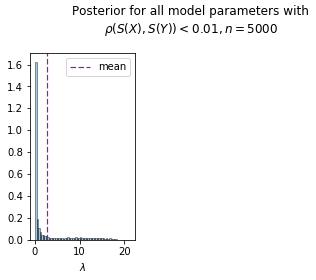

0.194972025693


In [12]:
mcmcSampler = pyabc.MCMCSampler(priors = [prior_lambda], simulator = simulator, observation = y0, summaries = [summary_mean])
mcmcSampler.sample(threshold = 0.01, nr_samples = 5000, step_size = 0.001)
mcmcSampler.Thetas

plot_marginals(mcmcSampler)

print(np.median(mcmcSampler.Thetas))

In [5]:
rejSampler = pyabc.RejectionSampler(priors = [prior_lambda], simulator = simulator, observation = y0, summaries = [summary_mean])
rejSampler.sample(threshold = 0.01, nr_samples = 5000)

Rejection sampler started with threshold: 0.01 and number of samples: 5000
Samples:   5000 - Threshold: 0.01 - Iterations:       5000 - Acceptance rate: 1.000000 - Time:     0.26 s
